In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
from string import ascii_uppercase
from collections import Counter

# Markov chains

A Markov chain is a mathematical model used to describe sequences of events where the **future depends only on the present**, not on the past. It's like a roadmap where the next step you take only depends on where you are now, not where you've been.

Here's a breakdown of the key features:

**1. States:** A Markov chain has a set of possible states, like sunny and rainy for weather, or win and lose for a coin toss.

**2. Transitions:** Between each state, there are transition probabilities. These determine the likelihood of moving from one state to another. For example, the probability of rain following a sunny day might be lower than the probability of rain following another rainy day.

**3. Single step memory:** This is the crucial characteristic. The past doesn't matter; the probability of any future state depends only on the current state. Imagine rolling a die: even if you rolled a six three times in a row, the odds of rolling a six next time are still the same.

**Uses:**

* **Prediction:** Markov chains can be used to predict future events based on current conditions, like weather forecasts or stock market trends.
* **Modeling:** They can be used to model complex systems with sequential behavior, like customer interactions or gene mutations.
* **Simulation:** They can be used to simulate systems and test different scenarios, like analyzing traffic flow or optimizing production lines.

Overall, Markov chains are powerful tools for understanding and predicting systems with sequential behavior, even though they're based on a simple, memoryless principle.



**Here are some examples of Markov chains, spanning various domains:**

**Games of Chance:**

- **Board games involving dice:** The progression of games like Snakes and Ladders or Monopoly is determined entirely by dice rolls, making them examples of Markov chains. The next state of the game (the position of players on the board) depends only on the current state and the outcome of the dice roll.
- **Roulette:** The probability of the ball landing on a particular number in roulette depends only on the number it landed on in the previous spin.
- **Rock-paper-scissors:** The probability of a player choosing a particular option in the next round can be influenced by their choices in previous rounds, forming a Markov chain.

**Natural Processes:**

- **Weather patterns:** The weather on a given day often depends on the weather conditions of the previous day. For example, if it's raining today, there's a higher chance of rain tomorrow than if it were sunny.
- **Genetics:** The inheritance of genetic traits can be modeled as a Markov chain, where the probability of a particular trait being passed on to offspring depends on the genetic makeup of the parents.

**Finance:**

- **Stock market fluctuations:** Stock prices can exhibit Markovian behavior, where the price on a given day is influenced by the price on the previous day.
- **Credit ratings:** The probability of a borrower's credit rating changing (e.g., from good to bad) can be modeled as a Markov chain.

**Language and Text:**

- **Text prediction:** Markov chains are used in text prediction algorithms, where the next word or character is predicted based on the previous ones.
- **Music generation:** Markov chains can be used to generate music that imitates certain styles or composers by analyzing patterns in musical sequences.

**Web Browsing:**

- **User navigation:** The probability of a user visiting a particular page on a website can be influenced by the page they were previously on, forming a Markov chain.
- **Clickstream analysis:** Markov chains are used to analyze patterns in user clicks on websites to understand user behavior and improve website design.

**Other Examples:**

- **Customer behavior:** Modeling customer behavior in retail settings (e.g., predicting the likelihood of repeat purchases)
- **Queueing systems:** Analyzing wait times and resource allocation in queues (e.g., at call centers or banks)
- **Reliability engineering:** Predicting the failure rates of components in systems
- **Bioinformatics:** Modeling DNA sequences and protein structures
- **Social networks:** Analyzing the spread of information or influence in social networks


### Example

A salesman lives in town ‘a’ and is responsible for towns ‘a’, ‘b’,
and ‘c’. Each week he is required to visit a different town. When
he is in his home town, it makes no difference which town he
visits next so he flips a coin and if it is heads he goes to ‘b’ and if
tails he goes to ‘c’. However, after spending a week away from
home he has a slight preference for going home so when he is in
either towns ‘b’ or ‘c’ he flips two coins. If two heads occur, then
he goes to the other town; otherwise he goes to ‘a’. The
successive towns that he visits form a Markov chain with state
space $S = \{a, b, c\}$ where the random variable $X_t$ equals $a$, $b$, or
$c$ according to his location during week $t$.

![Imgur](https://i.imgur.com/h8iGivu.png)

- See: https://drive.google.com/file/d/0B-dmEvN59Z2ZNVh5MDV5YjlxMzQ/view


### Start with theoretical solution

A probability vector $\pi$ is called a stationary distribution over $S$ for $P$ if it satisfies the stationary equations:

$$
\boldsymbol{\pi P = \pi}
$$
$$
\sum_{i \in S} \pi_i = 1
$$

For our travel, the equations are:

$$
-\pi_a + 0.75 \pi_b + 0.75 \pi_c = 0 
$$
$$
0.5 \pi_a - \pi_b + 0.25 \pi_c = 0 
$$
$$
0.5 \pi_a + 0.25 \pi_b - \pi_c = 0 
$$
$$
\pi_a + \pi_b + \pi_c = 1
$$

If a MC has a stationary distribution $\pi$, running enough time the MC, 
the PMF for every $X_t \in S$, will be close to $\pi$.

In [ ]:
P = np.matrix("0 0.5 0.5; 0.75 0 0.25; 0.75 0.25 0")
dfP = pd.DataFrame(P, columns=['a', 'b', 'c'], index=['a', 'b', 'c'])
dfP

,a,b,c
a,0.00,0.50,0.50
b,0.75,0.00,0.25
c,0.75,0.25,0.00


In [ ]:
A = np.matrix('0.5 -1 0.25; 0.5 0.25 -1; 1 1 1')

b = np.matrix('0; 0; 1')

pi = np.linalg.solve(A, b)
print("Solution for pa, pb, bc:", pi.T)

A**-1*b

Solution for pa, pb, bc: [[0.42857143 0.28571429 0.28571429]]


matrix([[0.42857143],
        [0.28571429],
        [0.28571429]])

### Numerical solution

The n-step transition probability from 
$i$ to $j$ is the probability of being at $j$ exactly $n$ steps after being at $i$. 
We denote this by $q^{(n)}_{ij}$:
$$
q^{(n)}_{ij} = P (X_n = j|X_0 = i).
$$
The $n^{th}$ power of the transition matrix gives the
n-step transition probabilities
$$
q^{(n)}_{ij} \text{ is the } (i, j) \text{ entry of }Q^n.
$$

![Picture title](image-20230630-194034.png)

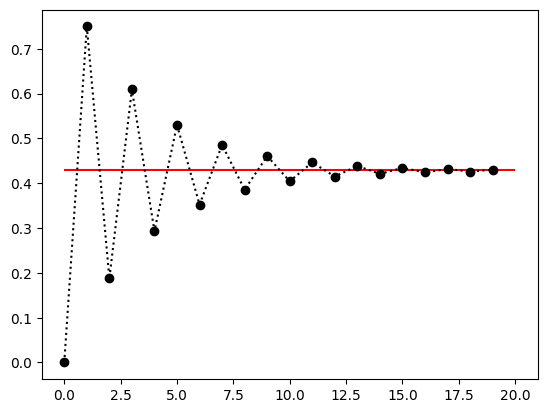

matrix([[0.43038355, 0.28480823, 0.28480823],
        [0.42721234, 0.28639383, 0.28639383],
        [0.42721234, 0.28639383, 0.28639383]])

In [ ]:
Q = np.matrix("0 0.5 0.5; 0.75 0 0.25; 0.75 0.25 0")

n = 20

cities = {'a': 0, 'b': 1, 'c': 2}

start_city, final_city = 'b', 'a'

p_final_city = []

for i in range(n):
    p_final_city += [(Q**i)[cities[start_city], cities[final_city]]]

plt.hlines(pi[cities[final_city]], 0, n, 'r')
plt.plot(p_final_city, ':ko')
plt.show()
Q**20

### Solution by simulation

- Random walks on a graph



In [ ]:
### code

P = np.matrix("0 0.5 0.5; 0.75 0 0.25; 0.75 0.25 0")
dfP = pd.DataFrame(P, columns=['a', 'b', 'c'], index=['a', 'b', 'c'])

start = 'a'

walk = [start]

n = 10  # steps

for i in range(n):
    walk += [np.random.choice(list(dfP.columns), p=list(dfP.loc[walk[-1]]))]
walk

['a', 'b', 'a', 'c', 'a', 'c', 'a', 'c', 'a', 'c', 'a']

In [ ]:
walk = ['a', 'b']

list(dfP.columns), list(dfP.loc[walk[-1]]), np.random.choice(list(dfP.columns), p=list(dfP.loc[walk[-1]]))

(['a', 'b', 'c'], [0.75, 0.0, 0.25], 'a')

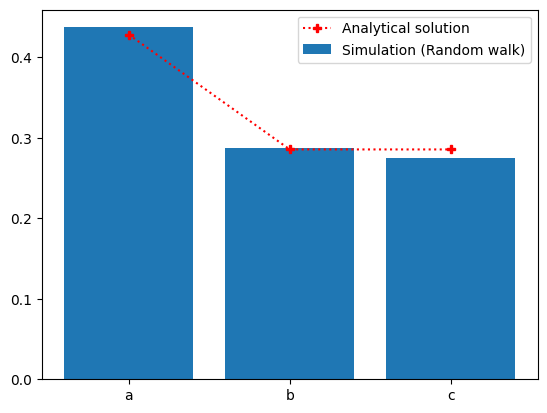

In [ ]:
### code

P = np.matrix("0 0.5 0.5; 0.75 0 0.25; 0.75 0.25 0")
dfP = pd.DataFrame(P, columns=['a', 'b', 'c'], index=['a', 'b', 'c'])

n = 1000  # time steps

start_city = 'a'

walk = [start_city]

for i in range(n):
    walk += [np.random.choice(list(dfP.columns), p=list(dfP.loc[walk[-1]]))]


Xt, fXt = np.unique(walk, return_counts=True)
plt.bar(Xt, fXt/fXt.sum(), label="Simulation (Random walk)")
plt.plot(pi, ':rP', label="Analytical solution")
plt.legend()

In [ ]:
len(walk), walk

(1001,
 ['a',
  'b',
  'a',
  'b',
  'a',
  'c',
  'a',
  'c',
  'a',
  'b',
  'a',
  'c',
  'a',
  'b',
  'a',
  'b',
  'a',
  'c',
  'b',
  'a',
  'c',
  'a',
  'b',
  'a',
  'b',
  'c',
  'b',
  'c',
  'b',
  'a',
  'c',
  'a',
  'b',
  'a',
  'c',
  'a',
  'c',
  'a',
  'c',
  'a',
  'c',
  'a',
  'c',
  'b',
  'a',
  'b',
  'a',
  'c',
  'b',
  'a',
  'c',
  'a',
  'c',
  'a',
  'c',
  'a',
  'b',
  'a',
  'c',
  'a',
  'c',
  'a',
  'c',
  'a',
  'c',
  'a',
  'b',
  'a',
  'c',
  'a',
  'b',
  'a',
  'b',
  'a',
  'b',
  'a',
  'c',
  'a',
  'c',
  'a',
  'c',
  'b',
  'a',
  'b',
  'a',
  'c',
  'b',
  'a',
  'b',
  'a',
  'c',
  'a',
  'c',
  'a',
  'c',
  'a',
  'b',
  'a',
  'b',
  'a',
  'c',
  'a',
  'c',
  'a',
  'c',
  'a',
  'b',
  'c',
  'a',
  'c',
  'a',
  'c',
  'b',
  'a',
  'b',
  'a',
  'b',
  'c',
  'a',
  'b',
  'a',
  'c',
  'a',
  'b',
  'a',
  'c',
  'b',
  'a',
  'c',
  'a',
  'b',
  'a',
  'b',
  'a',
  'c',
  'a',
  'b',
  'a',
  'c',
  'b',
  'c',
  'a',

## 1D random walk with reflecting and absorbing barriers

- **The fly of the first week**

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/rwbarriers.png)


- Markov chain
  - State transition diagram

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/drunkards-walk.png)

- Transition probability matrix $P$ below

In [ ]:
# Transition probability matrix P
n = 4
ds = [1] + [0.5]*(n-1)
Xs = np.diag(ds, 1)
di = [0.5]*(n-1) + [0]
Xi = np.diag(di, -1)
dd = [0]*(n) + [1]
Xd = np.diag(dd, 0)
P = Xs+Xi+Xd

sym.Matrix(P)

Matrix([
[  0, 1.0,   0,   0,   0],
[0.5,   0, 0.5,   0,   0],
[  0, 0.5,   0, 0.5,   0],
[  0,   0, 0.5,   0, 0.5],
[  0,   0,   0,   0, 1.0]])

### Analytical solution

- Check: https://en.wikipedia.org/wiki/Absorbing_Markov_chain

In [ ]:
I = np.identity(n)
Q = np.matrix(P[0:n,0:n])
IV = np.matrix([1]*n).transpose()
R = np.matrix([0, 0, 0, 0.5]).transpose()

mean_step_from_state_i = np.linalg.inv(I - Q)*IV
mssi = [print("From "+str(i)+" the avg step to reach n is "+str(si)) 
       for i,si in enumerate(mean_step_from_state_i)]

From 0 the avg step to reach n is [[16.]]
From 1 the avg step to reach n is [[15.]]
From 2 the avg step to reach n is [[12.]]
From 3 the avg step to reach n is [[7.]]


### Solution by simulation

- Use the probability transition matrix

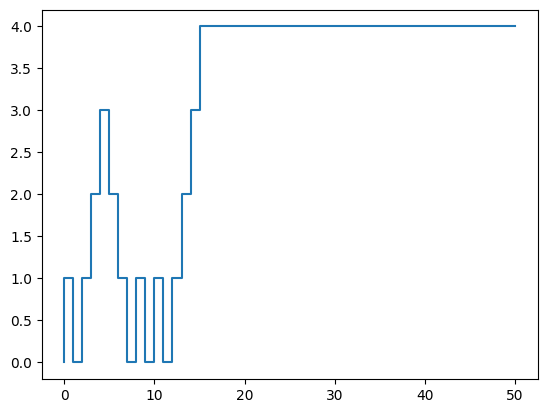

In [ ]:
n = 4

states = list(range(n+1))

walk = [0]

steps = 50

for i in range(steps):
    walk += [np.random.choice(states, p=P[walk[-1]])]
            

plt.step(range(steps+1), walk)

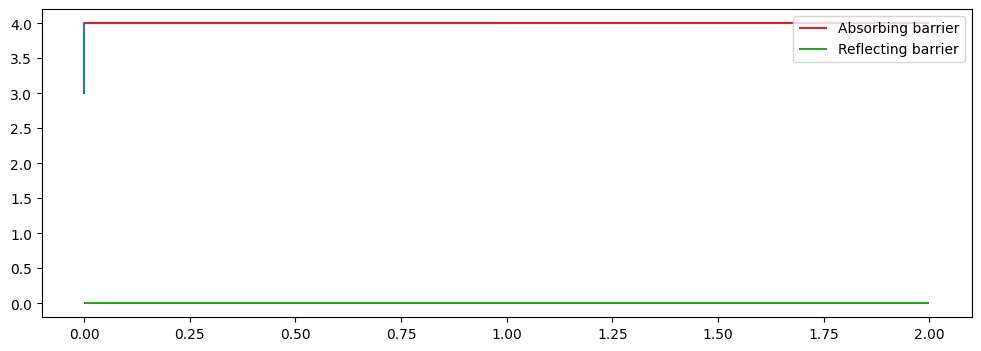

In [ ]:
states = list(range(n+1))
start_ = 3


def make_walk(start_, states, P):
    walk = [start_]

    while(True):
        walk += [np.random.choice(states, p=P[walk[-1]])]
        if walk[-1] == n: break
            
    return walk

walk = make_walk(start_, states, P)
plt.figure(figsize=(12,4))
plt.step(range(len(walk)), walk)
plt.hlines(n, 0, len(walk), color="tab:red", label="Absorbing barrier")
plt.hlines(0, 0, len(walk), color="tab:green", label="Reflecting barrier")
plt.legend()

In [ ]:
np.array([len(make_walk(start_, states, P))-1 for i in range(100000)]).mean()

7.01204

## Random shortest path

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/Shortest_path_with_direct_weights.svg/1280px-Shortest_path_with_direct_weights.svg.png)

- Find the most common random walks from origin A to target F.
- Use the same logic as our markov chain.

In [ ]:
n = 6  # states
states = list(ascii_uppercase[:n])
states

['A', 'B', 'C', 'D', 'E', 'F']

In [ ]:
M = np.matrix('0 4 2 0 0 0; 0 0 5 10 0 0; 0 0 0 0 3 0; 0 0 0 0 0 11; 0 0 0 4 0 0; 0 0 0 0 0 1')
M = np.array(M)
MD = pd.DataFrame(M, index = states, columns = states)
MD

,A,B,C,D,E,F
A,0,4,2,0,0,0
B,0,0,5,10,0,0
C,0,0,0,0,3,0
D,0,0,0,0,0,11
E,0,0,0,4,0,0
F,0,0,0,0,0,1


In [ ]:
P = [mii/mi.sum() if mii else mii for mi in M for mii in mi]
P = np.array([1-pi if (pi!=0 and pi!=1) else pi for pi in P])
P = P.reshape(n,n)
print(P)

[[0.         0.33333333 0.66666667 0.         0.         0.        ]
 [0.         0.         0.66666667 0.33333333 0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


In [ ]:
PD = pd.DataFrame(P, index = states, columns = states)
PD

,A,B,C,D,E,F
A,0.0,0.333333,0.666667,0.000000,0.0,0.0
B,0.0,0.000000,0.666667,0.333333,0.0,0.0
C,0.0,0.000000,0.000000,0.000000,1.0,0.0
D,0.0,0.000000,0.000000,0.000000,0.0,1.0
E,0.0,0.000000,0.000000,1.000000,0.0,0.0
F,0.0,0.000000,0.000000,0.000000,0.0,1.0


In [ ]:
start_ = 'A'
target = 'F'

all_walks = []

for i in range(10000):

    walk = [start_]

    while(True):
        walk += [np.random.choice(states, p=PD.loc[walk[-1]])]
        if walk[-1] == target: break
    all_walks += [walk]
C = Counter(str(wi) for wi in all_walks)
C

Counter({"['A', 'B', 'C', 'E', 'D', 'F']": 2219,
         "['A', 'C', 'E', 'D', 'F']": 6693,
         "['A', 'B', 'D', 'F']": 1088})

In [ ]:
def get_cost(path):
    return sum([MD[path[i]][path[i-1]] for i in range(1, len(path))])

paths = [Ci[2:-2].split("', '") for Ci in list(C.keys())]

{'-'.join(pi): get_cost(pi) for pi in paths}

{'A-B-C-E-D-F': 27, 'A-C-E-D-F': 20, 'A-B-D-F': 25}

### Appendix: Another example of markov chain

![](https://ds055uzetaobb.cloudfront.net/brioche/uploads/rtH8yftGTb-drunkards-walk.png)

- Transition probability matrix P

In [ ]:
P = np.matrix("1 0 0 0 0; 0.5 0 0.5 0 0; 0 0.5 0 0.5 0; 0 0 0.5 0 0.5; 0 0 0 0 1")
P

matrix([[1. , 0. , 0. , 0. , 0. ],
        [0.5, 0. , 0.5, 0. , 0. ],
        [0. , 0.5, 0. , 0.5, 0. ],
        [0. , 0. , 0.5, 0. , 0.5],
        [0. , 0. , 0. , 0. , 1. ]])

- Analytical solution

  - Check: https://en.wikipedia.org/wiki/Absorbing_Markov_chain

- Resources:
  - https://www.cs.upc.edu/~mjserna/docencia/ra-miri/2020/15-RA-MIRI-MC-Stationary.pdf

In [ ]:
Q = np.matrix(P[1:4,1:4])
R = np.matrix('0.5 0; 0 0; 0 0.5')
I = np.identity(3)
Isteps = np.matrix([1]*3).transpose()
Q, R, I, Isteps

(matrix([[0. , 0.5, 0. ],
         [0.5, 0. , 0.5],
         [0. , 0.5, 0. ]]),
 matrix([[0.5, 0. ],
         [0. , 0. ],
         [0. , 0.5]]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 matrix([[1],
         [1],
         [1]]))

In [ ]:
np.linalg.inv(I - Q)*R

matrix([[0.75, 0.25],
        [0.5 , 0.5 ],
        [0.25, 0.75]])

In [ ]:
np.linalg.inv(I - Q)*Isteps

matrix([[3.],
        [4.],
        [3.]])

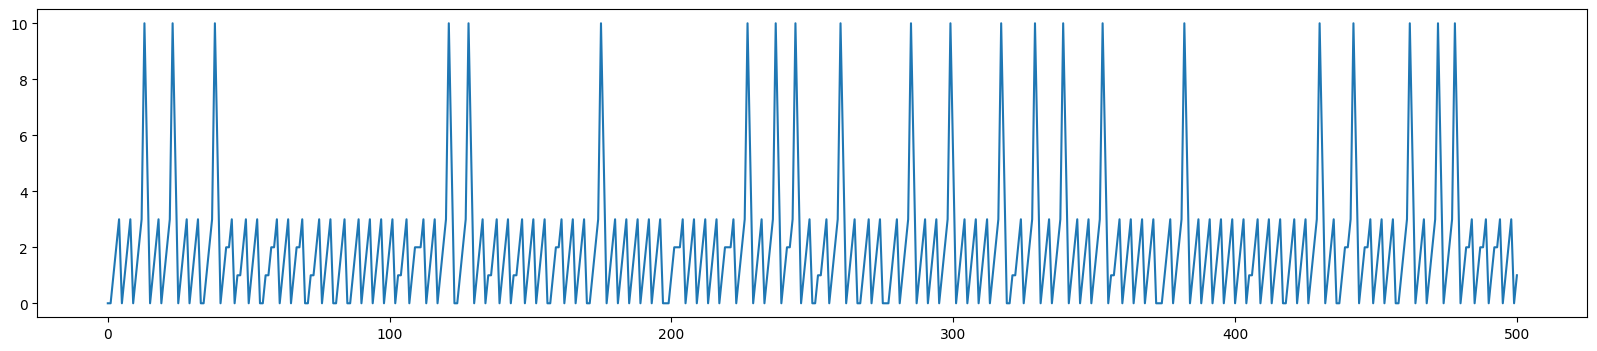

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

p = 0.2  # firing probability
pup = 0.9  # probability of going up (subthreshold)
states = ['0', '1', '2', '3', '10', '5']

P = np.array([[1-pup, pup, 0, 0, 0, 0],  # subthreshold
               [0, 1-pup, pup, 0, 0, 0],  # sub threshold
               [0, 0, 1-pup, pup, 0, 0],  # sub threshold
               [1-p, 0, 0, 0, p, 0],  # threshold: fire or not
               [0, 0, 0, 0, 0, 1],  # rest
               [1, 0, 0, 0, 0, 0]  # reset
               ])

dfP = pd.DataFrame(P, columns=states, index=states)

_start = '0'

walk = [_start]

n = 500  # steps

for i in range(n):
    walk += [np.random.choice(list(dfP.columns), p=list(dfP.loc[walk[-1]]))]

plt.figure(figsize=(20,4))
plt.plot(np.array(walk).astype('int'))

In [ ]:
walk

['0',
 '0',
 '1',
 '2',
 '3',
 '0',
 '1',
 '2',
 '3',
 '0',
 '1',
 '2',
 '3',
 '10',
 '5',
 '0',
 '1',
 '2',
 '3',
 '0',
 '1',
 '2',
 '3',
 '10',
 '5',
 '0',
 '1',
 '2',
 '3',
 '0',
 '1',
 '2',
 '3',
 '0',
 '0',
 '1',
 '2',
 '3',
 '10',
 '5',
 '0',
 '1',
 '2',
 '2',
 '3',
 '0',
 '1',
 '1',
 '2',
 '3',
 '0',
 '1',
 '2',
 '3',
 '0',
 '0',
 '1',
 '1',
 '2',
 '2',
 '3',
 '0',
 '1',
 '2',
 '3',
 '0',
 '1',
 '2',
 '2',
 '3',
 '0',
 '0',
 '1',
 '1',
 '2',
 '3',
 '0',
 '1',
 '2',
 '3',
 '0',
 '0',
 '1',
 '2',
 '3',
 '0',
 '0',
 '1',
 '2',
 '3',
 '0',
 '1',
 '2',
 '3',
 '0',
 '1',
 '2',
 '3',
 '0',
 '1',
 '2',
 '3',
 '0',
 '1',
 '1',
 '2',
 '3',
 '0',
 '1',
 '2',
 '2',
 '2',
 '3',
 '0',
 '1',
 '2',
 '3',
 '0',
 '1',
 '2',
 '3',
 '10',
 '5',
 '0',
 '0',
 '1',
 '2',
 '3',
 '10',
 '5',
 '0',
 '1',
 '2',
 '3',
 '0',
 '1',
 '1',
 '2',
 '3',
 '0',
 '1',
 '2',
 '3',
 '0',
 '1',
 '1',
 '2',
 '3',
 '0',
 '1',
 '2',
 '3',
 '0',
 '1',
 '2',
 '3',
 '0',
 '0',
 '1',
 '2',
 '2',
 '3',
 '0',
 '1',
 '2',
 '3',

Proyecto final:

1. https://anaconda.org/marsgr6/proyecto_ms_202410/notebook
2. https://anaconda.org/msgonzalez/proyecto_final_ms202220/notebook

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>